In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
# Load the data
df = pd.read_excel(r'C:\Users\purus\Dropbox\My PC (LAPTOP-586TAR0E)\Downloads\AnomaData.xlsx')  # Update with the correct path

In [4]:
# Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())

                 time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x51        x52       x54  \
0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   
3 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660 -4.938669   
4 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054 -4.939414   

         x55        x56       x57       x58       x59       x60  y.1  
0 -24.590146  1

In [5]:
# Data Quality Check
print("Missing values:\n", df.isnull().sum())

Missing values:
 time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64


In [6]:
# Outliers detection using Z-score
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]

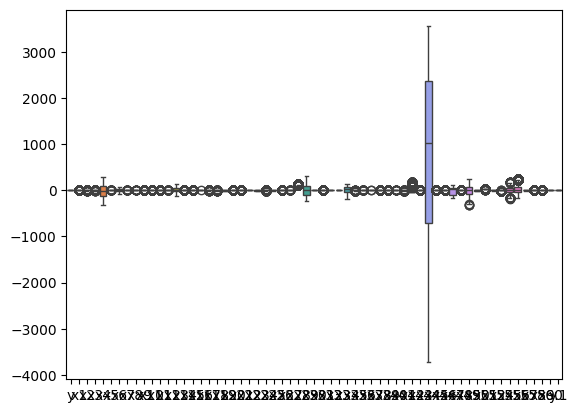

In [7]:
# Visualize the data
sns.boxplot(data=df)
plt.show()

In [8]:
# Step 6: Convert Date Columns to Datetime if Applicable
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['date'] = df['date'].astype(int) / 10**9  # Convert to timestamp (if necessary)

In [10]:
# Step 8: Drop the Target Column and Separate Features and Target Variable
X = df.drop('y', axis=1)
y = df['y']

In [11]:
# Step 9: Ensure All Features Are Numeric and Handle Missing Values
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()  # Drop rows with missing values
y = y.loc[X.index]  # Align y with X

In [12]:
# Step 10: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 11: Initial Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [14]:
# Step 12: Initial Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {accuracy}")

Initial Accuracy: 1.0


In [15]:
# Step 13: Initialize best_model
best_model = model

In [23]:
# Step 14: Hyperparameter Tuning if Accuracy is Less Than 75%
if accuracy < 0.75:
    print("Accuracy is less than 75%. Proceeding with hyperparameter tuning.")
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Step 14.2: Best Parameters and Score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy after Hyperparameter Tuning: {accuracy}")

    # Model Comparison if Accuracy is Still Less Than 75%
    if accuracy < 0.75:
        print("Accuracy is still less than 75%. Considering other models.")

        #Train and Evaluate SVM
        svm_model = SVC()
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        accuracy_svm = accuracy_score(y_test, y_pred)
        print(f"SVM Accuracy: {accuracy_svm}")

        #Train and Evaluate Gradient Boosting
        gb_model = GradientBoostingClassifier()
        gb_model.fit(X_train, y_train)
        y_pred = gb_model.predict(X_test)
        accuracy_gb = accuracy_score(y_test, y_pred)
        print(f"Gradient Boosting Accuracy: {accuracy_gb}")

        #Compare with the Best Random Forest Model
        print(f"Best Random Forest Accuracy: {accuracy}")
        
        #Select the Best Model Based on Accuracy
        best_model = max(
            [(best_model, accuracy), (svm_model, accuracy_svm), (gb_model, accuracy_gb)],
            key=lambda x: x[1]
        )[0]
else:
    print("Accuracy is satisfactory.")

# Step 15: Save the Best Model
joblib.dump(best_model, 'best_model.pkl')

# Step 16: Model Deployment Plan
print("Model has been saved successfully. Deploy the model using a web framework or API for predictions.")



Accuracy is satisfactory.
Model has been saved successfully. Deploy the model using a web framework or API for predictions.


In [24]:
# Step 15: Save the Best Model
joblib.dump(best_model, 'best_model.pkl')

# Step 16: Model Deployment Plan
print("Model has been saved successfully. Deploy the model using a web framework or API for predictions.")

Model has been saved successfully. Deploy the model using a web framework or API for predictions.
